In [1]:
import csv
import tempfile
import psycopg2 
from zipfile import ZipFile

def save_new_raw_data():
    local_path = 'melbourne-housing-snapshot.zip'

    with tempfile.TemporaryDirectory() as dirpath:
        with ZipFile(local_path, "r") as zipfile:
            names_list = zipfile.namelist()

            if names_list: 
                csv_file_path = zipfile.extract(names_list[0], path=dirpath)

                with open(csv_file_path, mode="r", encoding="utf-8") as csv_file:
                    reader = csv.DictReader(csv_file)

                    row = next(reader, None)
                    data= []
                    for i, row in enumerate(reader):
                        
                        print(i, row)
                        data.append(row)
    return data

def load(data) -> None:
    conn = psycopg2.connect(user="postgres",
                                password="Salsha12",
                                host="localhost",
                                port="5432",
                                database="Coba coba")
    cur = conn.cursor()

    cur.execute(''' DROP TABLE IF EXISTS melbourne ''')
 
    create_script= (
        """
        CREATE TABLE IF NOT EXISTS melbourne  (
            Postcode SERIAL NOT NULL,
            Address VARCHAR (55) NOT NULL,
            Rooms INT NOT NULL,
            Type VARCHAR (5) NOT NULL,
            Price INT NOT NULL,
            Suburb VARCHAR (55) NOT NULL,
            Method VARCHAR (5) NOT NULL,
            SellerG VARCHAR (55) NOT NULL,
            Date DATE NOT NULL,
            Distance INT NOT NULL,
            Bedroom2 INT NOT NULL,
            Bathroom INT NOT NULL,
            Car INT NOT NULL,
            Landsize INT NOT NULL,
            BuildingArea INT NOT NULL,
            YearBuilt INT NOT NULL,
            CouncilArea VARCHAR (55) NOT NULL,
            Lattitude VARCHAR (55) NOT NULL,
            Longtitude VARCHAR (55) NOT NULL,
            Regionname VARCHAR (55) NOT NULL,
            Propertycount INT NOT NULL
        );
        """
    )
    cur.execute(create_script)
    
    class NaN:
        def __init__(self, default=None):
          self.val = default
        def __repr__(self):
          return 'NaN' 
    for row in data:
        row= {a:0 if not b else b for a,b in row.items()}
        row['SellerG']= row['SellerG'].replace("'", '')
        cur.execute(
                f"""
                INSERT INTO melbourne (Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea,YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount)
                VALUES ('{row['Suburb']}','{row['Address']}', {row['Rooms']}, '{row['Type']}', {row['Price']}, '{row['Method']}', '{row['SellerG']}', TO_DATE('{row['Date']}', 'DD-MM-YYYY'), {row['Distance']}, {row['Postcode']}, {row['Bedroom2']}, {row['Bathroom']}, {row['Car']}, {row['Landsize']}, {row['BuildingArea']}, {row['YearBuilt']}, '{row['CouncilArea']}', '{row['Lattitude']}', '{row['Longtitude']}', '{row['Regionname']}', {row['Propertycount']}); 
                """
            )
        
    conn.commit()
    conn.close()
    print('Process Completed')

if __name__ == "__main__":
    load(save_new_raw_data())

0 {'Suburb': 'Abbotsford', 'Address': '25 Bloomburg St', 'Rooms': '2', 'Type': 'h', 'Price': '1035000.0', 'Method': 'S', 'SellerG': 'Biggin', 'Date': '4/02/2016', 'Distance': '2.5', 'Postcode': '3067.0', 'Bedroom2': '2.0', 'Bathroom': '1.0', 'Car': '0.0', 'Landsize': '156.0', 'BuildingArea': '79.0', 'YearBuilt': '1900.0', 'CouncilArea': 'Yarra', 'Lattitude': '-37.8079', 'Longtitude': '144.9934', 'Regionname': 'Northern Metropolitan', 'Propertycount': '4019.0'}
1 {'Suburb': 'Abbotsford', 'Address': '5 Charles St', 'Rooms': '3', 'Type': 'h', 'Price': '1465000.0', 'Method': 'SP', 'SellerG': 'Biggin', 'Date': '4/03/2017', 'Distance': '2.5', 'Postcode': '3067.0', 'Bedroom2': '3.0', 'Bathroom': '2.0', 'Car': '0.0', 'Landsize': '134.0', 'BuildingArea': '150.0', 'YearBuilt': '1900.0', 'CouncilArea': 'Yarra', 'Lattitude': '-37.8093', 'Longtitude': '144.9944', 'Regionname': 'Northern Metropolitan', 'Propertycount': '4019.0'}
2 {'Suburb': 'Abbotsford', 'Address': '40 Federation La', 'Rooms': '3',

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv("melb_data.csv")
df

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0   
1        Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0   
2        Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0   
3        Biggin   4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0   
4        Nelson   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0   
...         ...         ...       ...       ...  ...       ...  ...       ...   
13575     Barry  26/08/2017      16.7    3150.0  ...       2.0  2.0     652.0   
13576  Williams  26/08/2017       6.8    3016.0  ...       2.0  2.0     333.0   
13577     Raine  26/08/2017       6.8    3016.0  ...       2.0  4.0     436.0   
13578   Sweeney  26/08/2017       6.8    3016.0  ...       1.0  5.0     866.0   
13579   Village  26/08/2017       6.3    3013.0  ...       1.0  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0               NaN        NaN        Yarra -37.79960   144.99840   
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3               NaN        NaN        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575           NaN     1981.0          NaN -37.90562   145.16761   
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan        4019.0  
1           Northern Metropolitan        4019.0  
2           Northern Metropolitan        4019.0  
3           Northern Metropolitan        4019.0  
4           Northern Metropolitan        4019.0  
...                           ...           ...  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[13580 rows x 21 columns]

**Check Null Values**

In [ ]:
df.shape

(13580, 21)

In [ ]:
df.isnull().sum()/df.shape[0]*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

<Axes: ylabel='Frequency'>

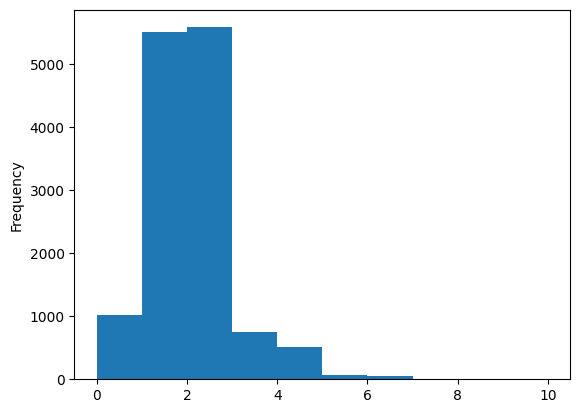

In [ ]:
df['Car'].plot(kind= 'hist')

In [ ]:
df.dropna(subset= ['CouncilArea'],inplace=True)

<Axes: >

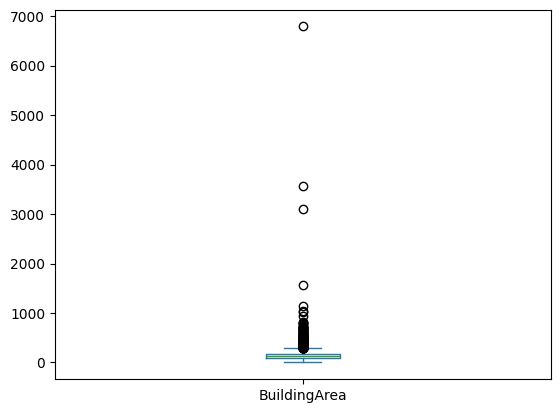

In [ ]:
df['BuildingArea'].plot(kind= 'box')

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
outliers = find_outliers_IQR(df['BuildingArea'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 332
max outlier value: 6791.0
min outlier value: 291.0


63       309.0
204      603.0
251      516.0
273      333.0
292      435.0
         ...  
11707    719.0
11763    300.0
12046    306.0
12064    934.0
12212    388.5
Name: BuildingArea, Length: 332, dtype: float64

In [ ]:
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = outliers.dropna().reset_index()
   return outliers_dropped

In [ ]:
upper_limit = df['BuildingArea'].mean() + 3*df['BuildingArea'].std()
print(upper_limit)
lower_limit = df['BuildingArea'].mean()-3*df['BuildingArea'].std()
print(lower_limit)

542.7379831704303
-254.29388025389298


In [ ]:
df['BuildingArea'] = np.where(df['BuildingArea'] > upper_limit,
   upper_limit,
   np.where(
       df['BuildingArea'] < lower_limit,
       lower_limit,
       df['BuildingArea']
   )
)

In [ ]:
df['BuildingArea'].fillna(df['BuildingArea'].median(), inplace=True)

<Axes: >

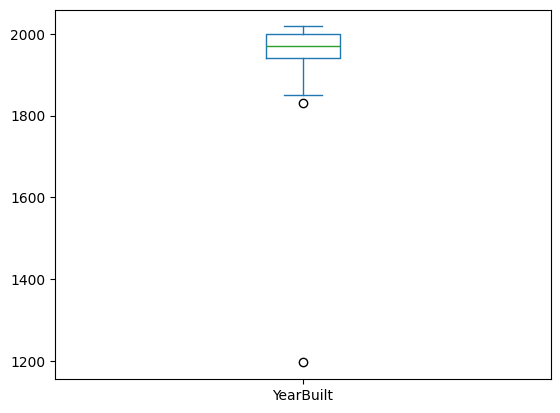

In [ ]:
df['YearBuilt'].plot(kind= 'box')

In [ ]:
df['YearBuilt'].fillna(df['YearBuilt'].median(), inplace=True)

In [ ]:
df= df.drop(index= df[df['YearBuilt']<=1250].index[0], axis= 0)

In [ ]:
df['Car'].fillna(df['Car'].mode()[0], inplace=True)

## Dealing with Duplicates

In [ ]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount]
Index: []

[0 rows x 21 columns]

## EDA

In [ ]:
import seaborn as sns

<Figure size 500x300 with 0 Axes>

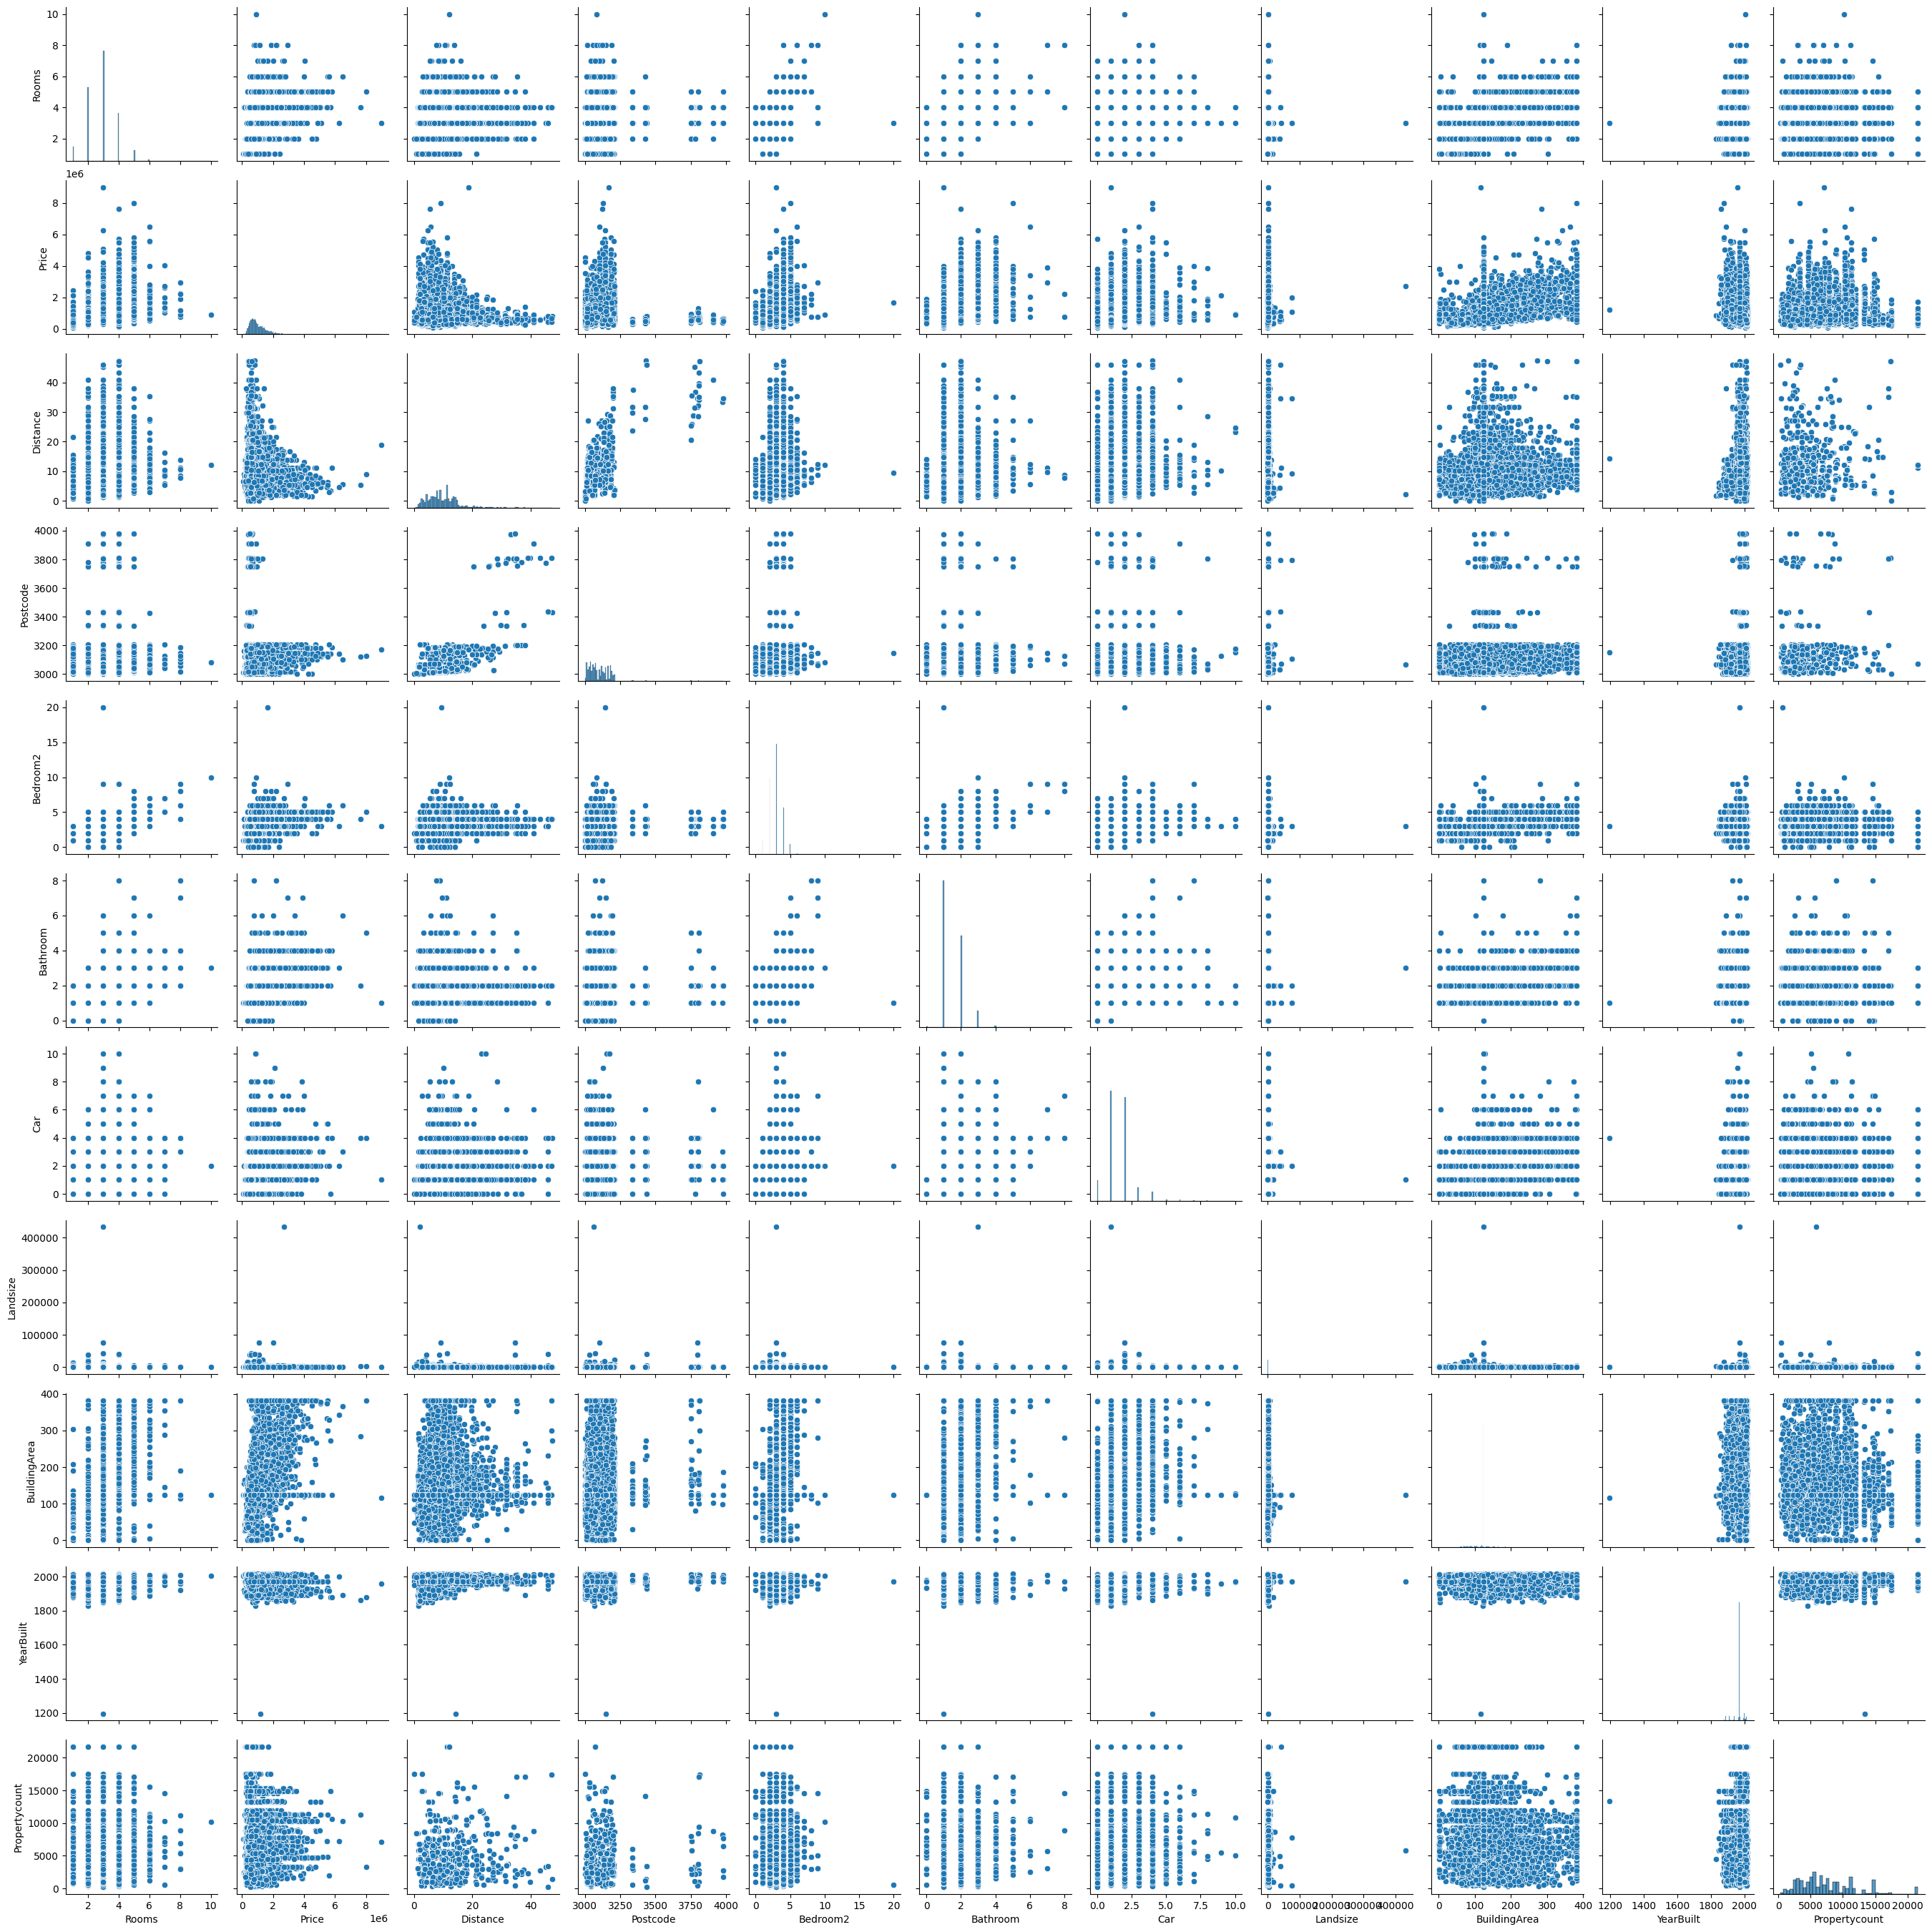

In [ ]:
plt.figure(figsize=(5,3))
sns.pairplot(numeric)

In [ ]:
numeric= df.select_dtypes(include=np.number).columns.tolist()
numeric = df[['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Propertycount']]
numeric

Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
0          2  1480000.0       2.5    3067.0       2.0       1.0  1.0   
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
3          3   850000.0       2.5    3067.0       3.0       2.0  1.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
12208      3  1285000.0       6.8    3016.0       3.0       1.0  0.0   
12209      2   560000.0       4.6    3181.0       2.0       1.0  1.0   
12210      3   525300.0      25.5    3750.0       3.0       2.0  2.0   
12211      2   750000.0       6.3    3013.0       2.0       1.0  2.0   
12212      6  2450000.0       6.3    3013.0       6.0       3.0  2.0   

       Landsize  BuildingArea  YearBuilt  Propertycount  
0         202.0         124.0     1970.0         4019.0  
1         156.0          79.0     1900.0         4019.0  
2         134.0         150.0     1900.0         4019.0  
3          94.0         124.0     1970.0         4019.0  
4         120.0         142.0     2014.0         4019.0  
...         ...           ...        ...            ...  
12208     296.0         124.0     1970.0         6380.0  
12209       0.0          61.6     2012.0         4380.0  
12210     400.0         124.0     1970.0         2940.0  
12211     269.0         124.0     1970.0         6543.0  
12212    1087.0         388.5     1920.0         6543.0  

[12210 rows x 11 columns]

<Axes: >

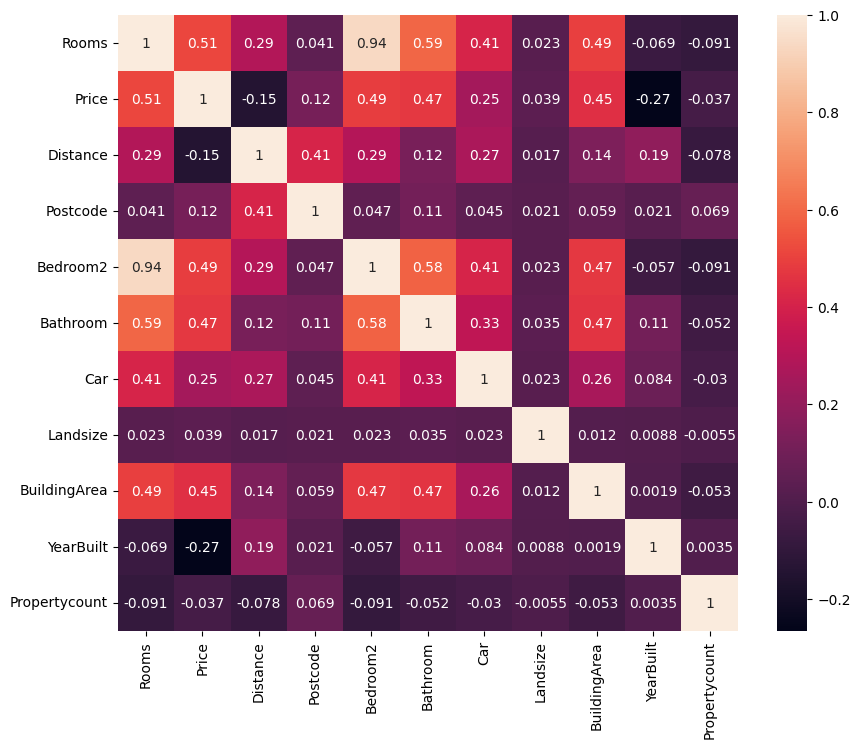

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(), annot=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8752\3183596039.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Price', data=df, errorbar=None, palette='rainbow');


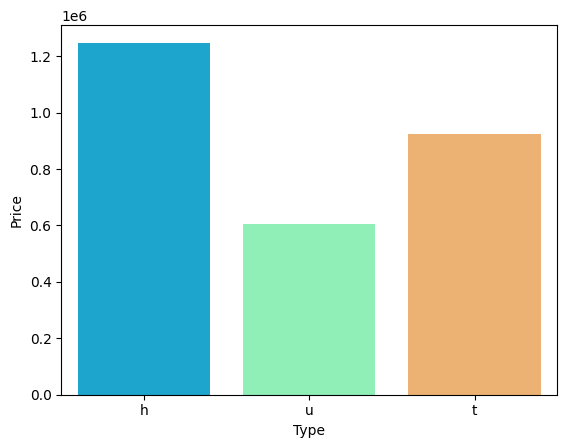

In [ ]:
sns.barplot(x='Type', y='Price', data=df, errorbar=None, palette='rainbow');

# Feature Engineering

In [ ]:
df.select_dtypes(include='object').columns.tolist()

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

**Convert to Datetime**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
df.isnull().sum()/df.shape[0]*100

Suburb           0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Date             0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
CouncilArea      0.0
Lattitude        0.0
Longtitude       0.0
Regionname       0.0
Propertycount    0.0
dtype: float64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
X= df.drop(['Price', 'Longtitude', 'Lattitude', 'Address', 'Date'], axis= 1)
y= df['Price']

In [ ]:
## subset categorical variables which you want to encode
Cat= df[['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']]

from sklearn.preprocessing import LabelEncoder
# Assigning numerical values and storing in another column
Cat = Cat.apply(LabelEncoder().fit_transform)
Cat

Suburb  Type  Method  SellerG  CouncilArea  Regionname
0           0     0       1       22           31           2
1           0     0       1       22           31           2
2           0     0       3       22           31           2
3           0     0       0       22           31           2
4           0     0       4      146           31           2
...       ...   ...     ...      ...          ...         ...
12208     299     0       1      100           10           6
12209     301     2       0      245           26           5
12210     302     0       1      207           29           2
12211     307     0       3      245           16           6
12212     307     0       4      224           16           6

[12210 rows x 6 columns]

In [ ]:
X= X.drop(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'], axis= 1)
X= pd.concat([X, Cat], axis= 1)
X

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0          2       2.5    3067.0       2.0       1.0  1.0     202.0   
1          2       2.5    3067.0       2.0       1.0  0.0     156.0   
2          3       2.5    3067.0       3.0       2.0  0.0     134.0   
3          3       2.5    3067.0       3.0       2.0  1.0      94.0   
4          4       2.5    3067.0       3.0       1.0  2.0     120.0   
...      ...       ...       ...       ...       ...  ...       ...   
12208      3       6.8    3016.0       3.0       1.0  0.0     296.0   
12209      2       4.6    3181.0       2.0       1.0  1.0       0.0   
12210      3      25.5    3750.0       3.0       2.0  2.0     400.0   
12211      2       6.3    3013.0       2.0       1.0  2.0     269.0   
12212      6       6.3    3013.0       6.0       3.0  2.0    1087.0   

       BuildingArea  YearBuilt  Propertycount  Suburb  Type  Method  SellerG  \
0             124.0     1970.0         4019.0       0     0       1       22   
1              79.0     1900.0         4019.0       0     0       1       22   
2             150.0     1900.0         4019.0       0     0       3       22   
3             124.0     1970.0         4019.0       0     0       0       22   
4             142.0     2014.0         4019.0       0     0       4      146   
...             ...        ...            ...     ...   ...     ...      ...   
12208         124.0     1970.0         6380.0     299     0       1      100   
12209          61.6     2012.0         4380.0     301     2       0      245   
12210         124.0     1970.0         2940.0     302     0       1      207   
12211         124.0     1970.0         6543.0     307     0       3      245   
12212         388.5     1920.0         6543.0     307     0       4      224   

       CouncilArea  Regionname  
0               31           2  
1               31           2  
2               31           2  
3               31           2  
4               31           2  
...            ...         ...  
12208           10           6  
12209           26           5  
12210           29           2  
12211           16           6  
12212           16           6  

[12210 rows x 16 columns]

In [ ]:
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())